In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Step 1: Define Cities (x, y coordinates)
cities = {
    0: (0, 0),
    1: (1, 5),
    2: (5, 2),
    3: (6, 6),
    4: (8, 3),
    5: (7, 0)
}

In [2]:
cities

{0: (0, 0), 1: (1, 5), 2: (5, 2), 3: (6, 6), 4: (8, 3), 5: (7, 0)}

In [3]:
N = len(cities)

# Step 2: Distance Matrix
def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

In [4]:
distance_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            distance_matrix[i][j] = euclidean(cities[i], cities[j])

In [5]:
distance_matrix

array([[0.        , 5.09901951, 5.38516481, 8.48528137, 8.54400375,
        7.        ],
       [5.09901951, 0.        , 5.        , 5.09901951, 7.28010989,
        7.81024968],
       [5.38516481, 5.        , 0.        , 4.12310563, 3.16227766,
        2.82842712],
       [8.48528137, 5.09901951, 4.12310563, 0.        , 3.60555128,
        6.08276253],
       [8.54400375, 7.28010989, 3.16227766, 3.60555128, 0.        ,
        3.16227766],
       [7.        , 7.81024968, 2.82842712, 6.08276253, 3.16227766,
        0.        ]])

In [7]:
# Step 3: Route Cost Function
def route_distance(route):
    return sum(distance_matrix[route[i]][route[(i + 1) % N]] for i in range(N))

In [9]:
route_distance([1, 2, 0, 3, 5, 4])

np.float64(35.39559626112019)

In [10]:
# Step 4: GA Parameters
POP_SIZE = 50
NUM_GENERATIONS = 200
TOURNAMENT_SIZE = 5
MUTATION_RATE = 0.2

In [11]:
def initial_population():
    return [random.sample(range(N), N) for _ in range(POP_SIZE)]

In [13]:
def selection(pop):
    candidates = random.sample(pop, TOURNAMENT_SIZE)
    return min(candidates, key=route_distance)

In [14]:
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(N), 2))
    child = [-1] * N
    child[start:end] = parent1[start:end]
    fill = [city for city in parent2 if city not in child]
    pointer = 0
    for i in range(N):
        if child[i] == -1:
            child[i] = fill[pointer]
            pointer += 1
    return child

In [17]:
def mutate(route):
    if random.random() < MUTATION_RATE:
        i, j = random.sample(range(N), 2)
        route[i], route[j] = route[j], route[i]
    return route

In [21]:
mutate([1, 2, 0, 3, 5, 4])

[1, 2, 0, 3, 5, 4]

In [22]:

# Step 6: GA Loop
population = initial_population()
best_distance_history = []

Best route found: [5, 2, 0, 1, 3, 4]
Minimum distance: 25.17945989469863


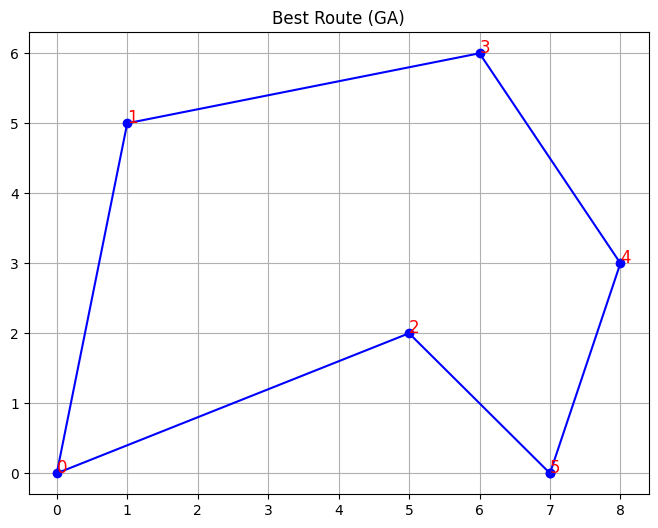

In [23]:

for generation in range(NUM_GENERATIONS):
    new_population = []
    for _ in range(POP_SIZE):
        p1 = selection(population)
        p2 = selection(population)
        child = crossover(p1, p2)
        child = mutate(child)
        new_population.append(child)
    population = new_population
    best_route = min(population, key=route_distance)
    best_distance = route_distance(best_route)
    best_distance_history.append(best_distance)

# Step 7: Result
print("Best route found:", best_route)
print("Minimum distance:", route_distance(best_route))


# Optional: Visualize Best Route
def plot_route(route):
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', color='blue')
    for i, city in enumerate(route):
        plt.text(cities[city][0], cities[city][1], str(city), fontsize=12, color='red')
    plt.title("Best Route (GA)")
    plt.grid()
    plt.show()

plot_route(best_route)
